In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("eval_ckpt200.csv")
display(df)

#read
obs_columns = [f'obs{i}' for i in range(15)]
obs_array = df[obs_columns].to_numpy()

obs_array = np.repeat(obs_array, repeats=3, axis=1) #repeat 3 times to simulate hisotry 3
obs_array.shape

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs5,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14
0,0,-5.607039e-13,-1.035936e-11,0.079485,-0.329381,0.638058,0.109683,4.483758,-4.792757e-10,-1.963810e-09,...,4.149016e-09,1.337705e-09,1.777128e-08,2.641428e-09,-0.973978,-0.226644,-0.541211,-0.840887,-0.894049,-0.447969
1,1,-2.915986e-04,4.536705e-05,0.078309,-0.324899,0.622800,0.110622,4.435982,-5.393645e-02,8.710887e-03,...,3.149938e-02,-1.225126e-01,5.614581e-02,-2.410247e-01,-0.962042,-0.272901,-0.541211,-0.840887,-0.899846,-0.436208
2,2,-1.040036e-03,1.823950e-04,0.076779,-0.311257,0.579811,0.112795,4.300138,-8.961753e-02,1.846746e-02,...,7.584372e-02,-2.365920e-01,1.041195e-01,-4.697657e-01,-0.916221,-0.400673,-0.541211,-0.840887,-0.915180,-0.403045
3,3,-1.981148e-03,4.260503e-04,0.074940,-0.286783,0.511723,0.114660,4.081288,-9.172846e-02,2.999213e-02,...,1.423519e-01,-3.400148e-01,1.323182e-01,-6.843922e-01,-0.807378,-0.590034,-0.541211,-0.840887,-0.936538,-0.350566
4,4,-2.956220e-03,6.125970e-04,0.075397,-0.279858,0.474245,0.128089,3.802913,-6.285636e-02,2.849954e-02,...,2.407318e-02,-1.702393e-01,1.327701e-01,-8.312293e-01,-0.614159,-0.789182,-0.541211,-0.840887,-0.947425,-0.319978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,-4.343445e+00,1.295039e-01,0.060678,0.255550,-0.055244,0.381378,-66.818359,-1.846324e-01,-4.561147e-01,...,3.808615e-01,-1.685637e-01,-2.056376e-01,4.096321e-01,0.747914,-0.663796,0.544666,-0.838653,0.982392,-0.186830
996,996,-4.344929e+00,1.252687e-01,0.058856,0.310498,-0.069876,0.360577,-66.645119,-1.127401e-01,-3.912699e-01,...,3.862574e-01,-1.107676e-01,-2.042645e-01,5.073525e-01,0.622296,-0.782782,0.544666,-0.838653,0.973446,-0.228916
997,997,-4.345574e+00,1.217185e-01,0.056612,0.360196,-0.070900,0.340336,-66.435875,-1.727558e-02,-3.101339e-01,...,4.084020e-01,-5.987872e-02,-2.045172e-01,5.708079e-01,0.446124,-0.894971,0.544666,-0.838653,0.966576,-0.256381
998,998,-4.345385e+00,1.190245e-01,0.054978,0.407443,-0.064192,0.319449,-66.210808,5.323364e-02,-2.354030e-01,...,3.631137e-01,-9.350883e-03,-1.950176e-01,6.410552e-01,0.235139,-0.971962,0.544666,-0.838653,0.961241,-0.275708


(1000, 45)

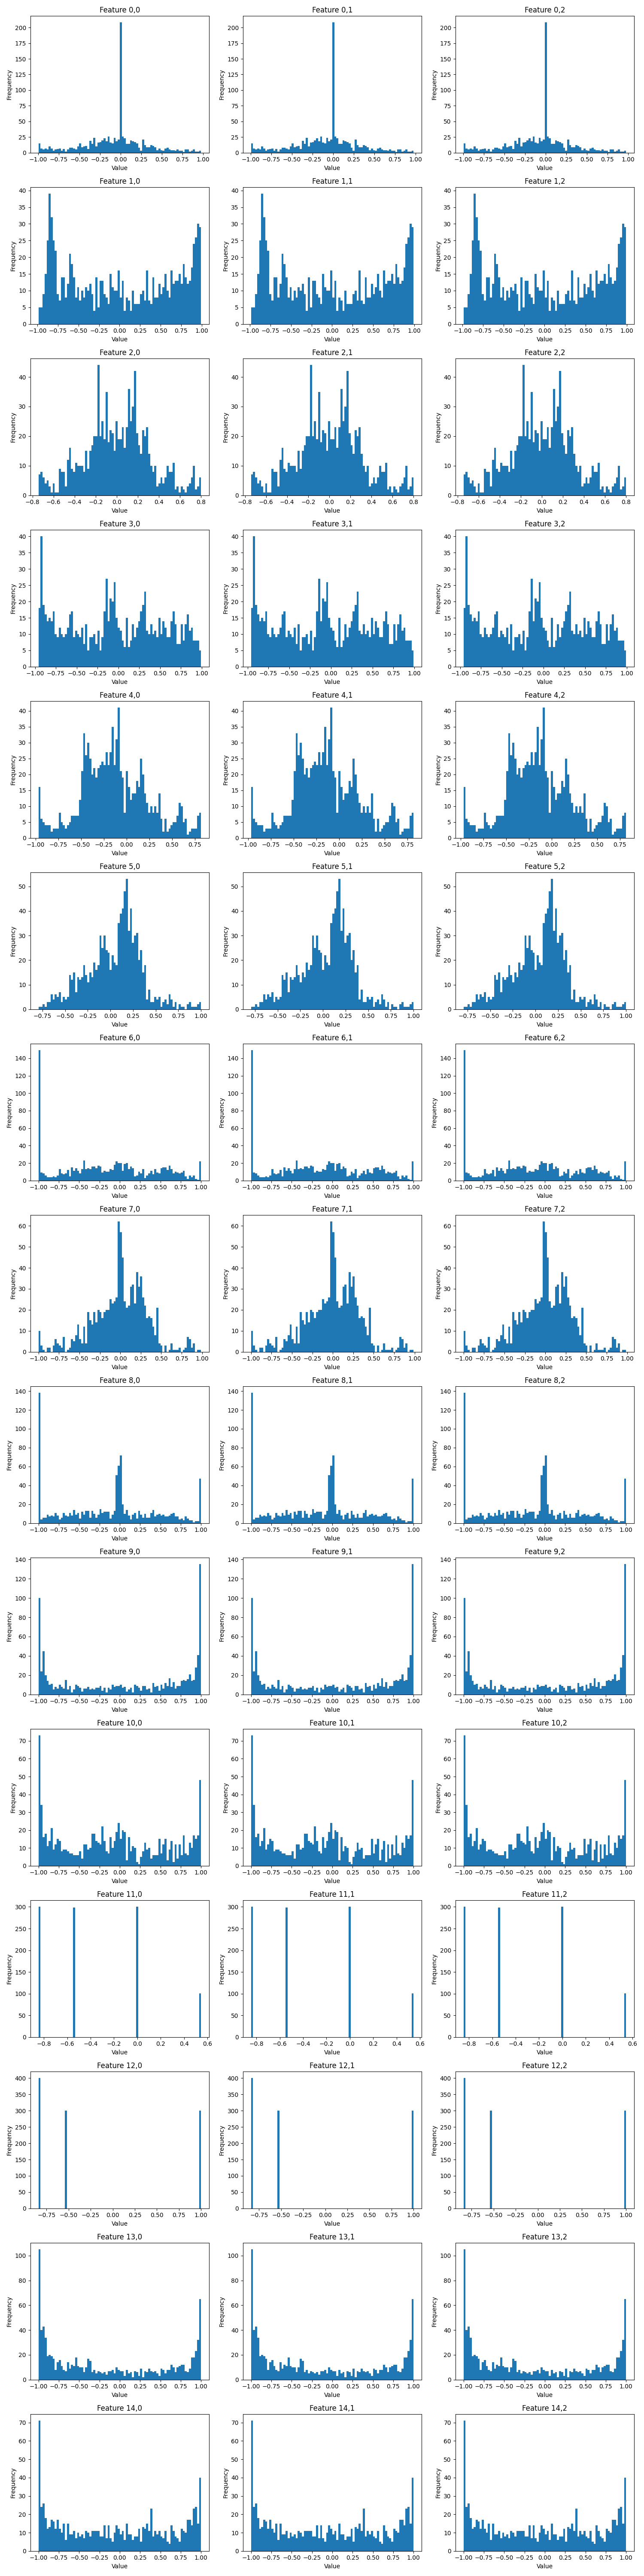

In [10]:

num_features = obs_array.shape[1]
num_rows = (num_features + 2) // 3  # Calculate rows needed, rounding up
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    ax = axes[i]
    ax.hist(obs_array[:,i], bins=80)
    ax.set_title(f'Feature {i//3},{i%3}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for i in range(num_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

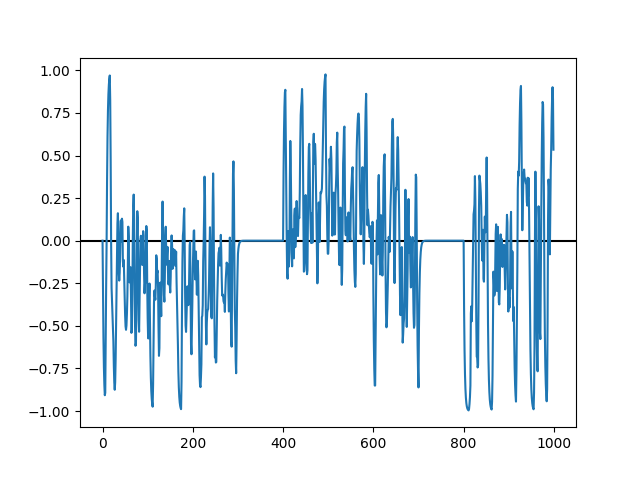

In [5]:
%matplotlib widget
plt.figure()
plt.axhline(0, color='black')
plt.plot(obs_array[:,0])

Text(0.5, 0, 'Time (s)')

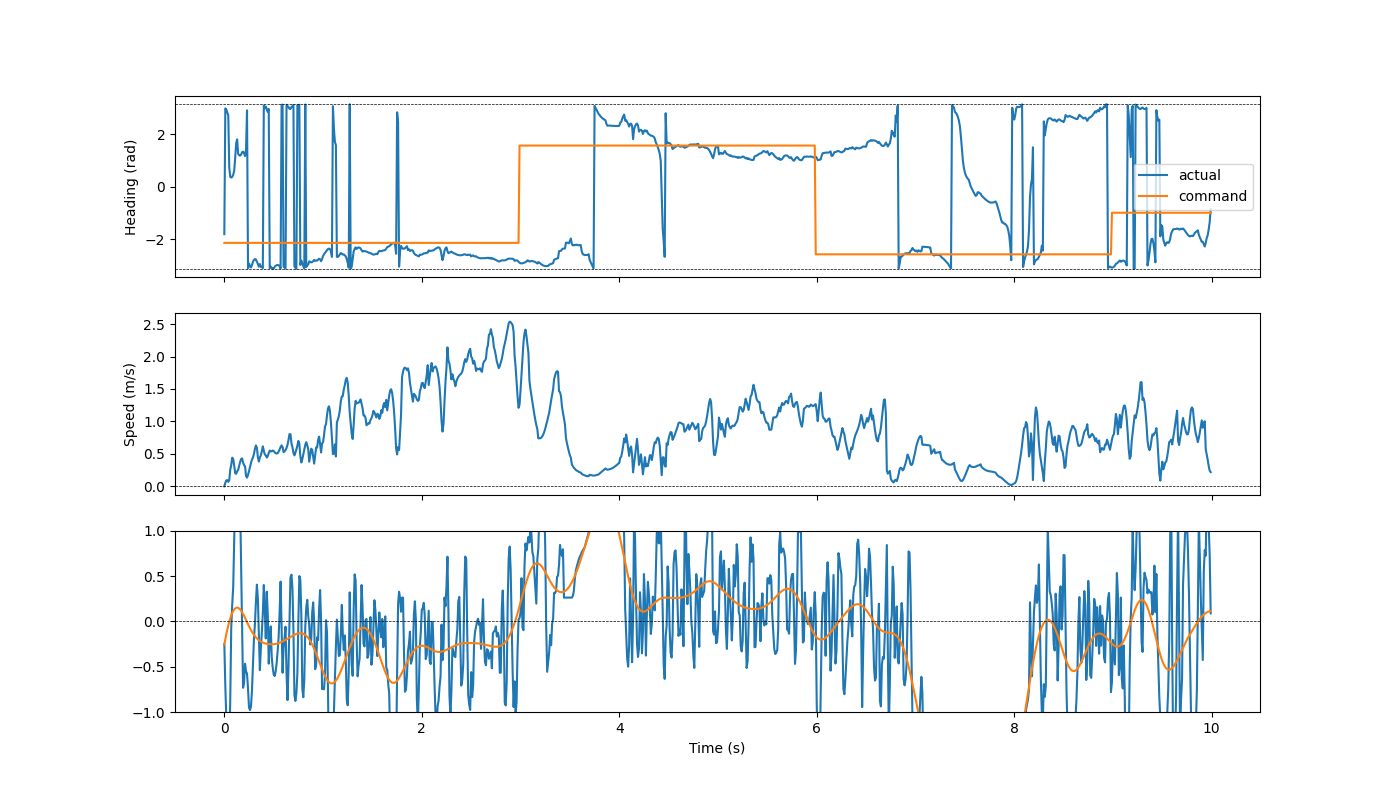

In [14]:
heading = np.arctan2(df['vel1'], df['vel0'])
speed = np.linalg.norm(df[['vel0', 'vel1']], axis=1)
# heading

des_heading = np.arctan2(df['obs12'], df['obs11'])
fig, axs = plt.subplots(3,1, sharex=True, figsize=(14,8))
axs[0].plot(np.arange(len(df))*0.01, heading, label='actual')
axs[0].plot(np.arange(len(df))*0.01, des_heading, label='command')
axs[0].axhline(-np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].axhline(np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].set_ylabel('Heading (rad)')
axs[0].legend()


axs[1].plot(np.arange(len(df))*0.01, speed)
axs[1].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[1].set_ylabel('Speed (m/s)')


# Design Butterworth low-pass filter
nyquist = 1/(2*0.01)  # Nyquist frequency
cutoff = 2  # Hz
order = 3
from scipy.signal import butter, filtfilt
b, a = butter(order, cutoff/nyquist, btype='low')
action_filtered = filtfilt(b, a, df['action'])

axs[2].plot(np.arange(len(df))*0.01, df['action'])
axs[2].plot(np.arange(len(df))*0.01, action_filtered)
axs[2].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[2].set_ylim(-1, 1)


axs[-1].set_xlabel('Time (s)')

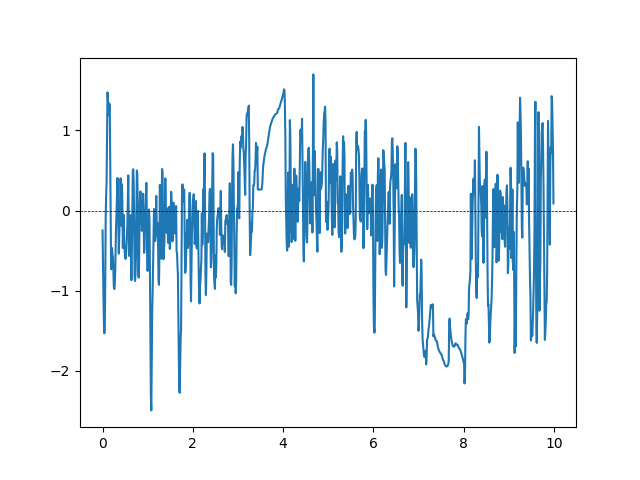

In [8]:
plt.figure()
